In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_csv("datasets/fertilizer_recommendation.csv")
data.head()

,temparature,humidity,moisture,soil,crop,N,K,P,label
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [108]:
data["label"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [109]:
data["soil"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [110]:
data["crop"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [111]:
data.columns

Index(['temparature', 'humidity', 'moisture', 'soil', 'crop', 'N', 'K', 'P',
       'label'],
      dtype='object')

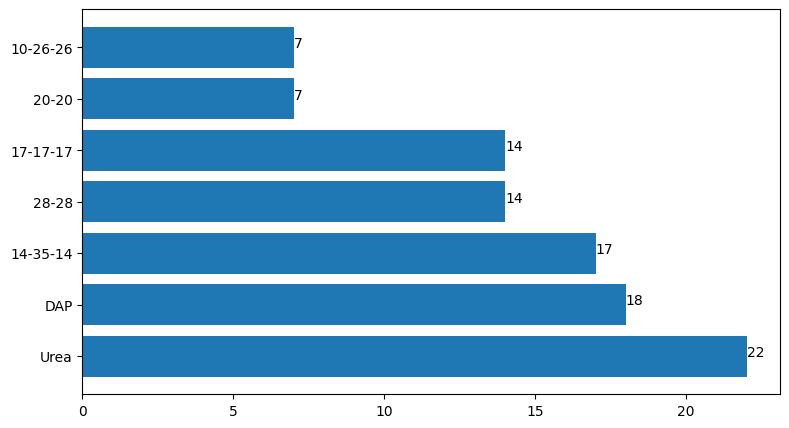

In [112]:
labels = data["label"].unique()
counts = list(data["label"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

<Axes: >

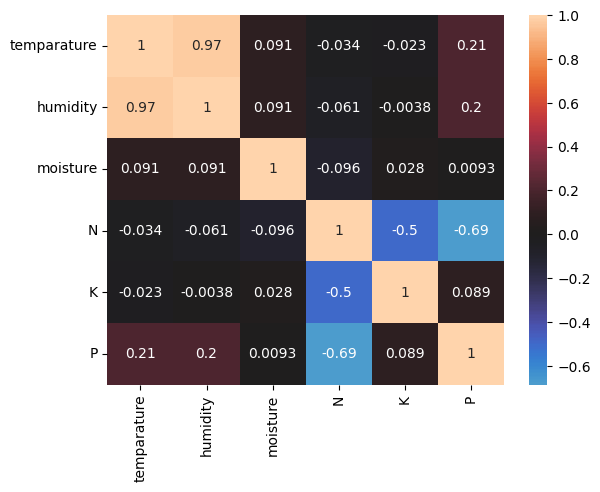

In [113]:
continuous_data_cols = ["temparature", "humidity", "moisture", "N", "K", "P"]
categorical_data_cols = ["soil", "crop"]
sns.heatmap(data[continuous_data_cols].corr(), center = 0, annot = True)


In [114]:
soil_type_label_encoder = LabelEncoder()
data["soil"] = soil_type_label_encoder.fit_transform(data["soil"])

In [115]:
crop_type_label_encoder = LabelEncoder()
data["crop"] = crop_type_label_encoder.fit_transform(data["crop"])

In [116]:
croptype_dict = {}
for i in range(len(data["crop"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["soil"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [117]:
fertname_label_encoder = LabelEncoder()
data["label"] = fertname_label_encoder.fit_transform(data["label"])

In [118]:
fertname_dict = {}
for i in range(len(data["label"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [119]:
data.head()

,temparature,humidity,moisture,soil,crop,N,K,P,label
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [120]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 4: 17, 1: 14, 3: 14, 2: 7, 0: 7})

In [121]:
from imblearn.over_sampling import SMOTE
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


In [122]:
print(f"Total Data after Upsampling: {len(X)}")

Total Data after Upsampling: 154


In [123]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 3)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")
X_train

Train Data: (123, 8), (123,)
Train Data: (31, 8), (31,)


array([[33, 64, 39,  1,  6, 13,  0, 10],
       [27, 54, 31,  1,  6, 11,  0, 13],
       [25, 50, 56,  2,  8, 11, 13, 15],
       [30, 60, 42,  4,  4, 21,  0, 18],
       [32, 62, 30,  2,  8, 38,  0,  0],
       [27, 53, 59,  2,  8, 10,  0, 15],
       [30, 60, 58,  2,  8, 10,  7, 32],
       [32, 63, 46,  2,  8, 22,  0, 18],
       [25, 50, 40,  1,  7,  6, 19, 16],
       [28, 56, 57,  0,  8, 11,  0, 11],
       [29, 58, 65,  0,  1, 14,  0, 35],
       [35, 68, 33,  3,  9, 11,  0, 37],
       [25, 50, 39,  4,  0, 21,  0, 19],
       [25, 50, 50,  2,  5, 11, 12, 14],
       [36, 68, 33,  0,  5, 13,  0, 14],
       [28, 54, 37,  0,  4, 36,  0,  0],
       [26, 52, 59,  2,  8, 11,  0,  9],
       [34, 65, 34,  1,  4, 12,  0, 14],
       [31, 62, 44,  4,  0, 21,  0, 28],
       [38, 70, 48,  2, 10,  8,  8, 28],
       [28, 54, 35,  0,  4, 41,  0,  0],
       [29, 56, 46,  3,  1,  5, 18, 16],
       [34, 65, 31,  3,  9, 23,  0, 21],
       [27, 53, 34,  0,  5, 42,  0,  0],
       [26, 52, 

In [125]:
# Standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.88214705,  0.92127882, -0.40835424, -0.65542077,  0.35787287,
        -0.2980707 , -0.80230348, -0.68739236],
       [-0.90148178, -0.87455787, -1.17372675, -0.65542077,  0.35787287,
        -0.48138419, -0.80230348, -0.43399797],
       [-1.49602472, -1.59289254,  1.21806235,  0.10511465,  1.05107543,
        -0.48138419,  1.09826432, -0.26506838],
       [-0.00966736,  0.20294415, -0.12133954,  1.6261855 , -0.33532969,
         0.43518323, -0.80230348, -0.011674  ],
       [ 0.58487558,  0.56211148, -1.26939831,  0.10511465,  1.05107543,
         1.99334783, -0.80230348, -1.53204031],
       [-0.90148178, -1.05414154,  1.50507704,  0.10511465,  1.05107543,
        -0.57304093, -0.80230348, -0.26506838],
       [-0.00966736,  0.20294415,  1.40940548,  0.10511465,  1.05107543,
        -0.57304093,  0.22107918,  1.17083314],
       [ 0.58487558,  0.74169515,  0.26134671,  0.10511465,  1.05107543,
         0.52683997, -0.80230348, -0.011674  ],
       [-1.49602472, -1.59289254

In [126]:
#K-NEAREST NEIGHBORS (KNN)
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
predicted = KNN.predict(X_test)
x = metrics.accuracy_score(y_test, predicted)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x * 100)
print(classification_report(y_test,predicted))

KNN Accuracy is:  93.54838709677419
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         5
           3       1.00      0.80      0.89         5
           4       0.86      1.00      0.92         6
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.95      0.94      0.94        31
weighted avg       0.95      0.94      0.93        31



In [127]:
#SUPPORT VECTOR MACHINE (SVM)
from sklearn.svm import SVC
SVC = SVC(probability=True)
SVC.fit(X_train,y_train)
predicted = SVC.predict(X_test)
x = metrics.accuracy_score(y_test, predicted)
acc.append(x)
model.append('SVC')
print("SVC Accuracy is: ", x * 100)
print(classification_report(y_test,predicted))

SVC Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [128]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predicted = rfc.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is ",x * 100)
print(classification_report(y_test,predicted))

Random Forest Accuracy is  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



<Axes: title={'center': 'Accuracy Comparision'}, xlabel='Accuracy', ylabel='Algorithms'>

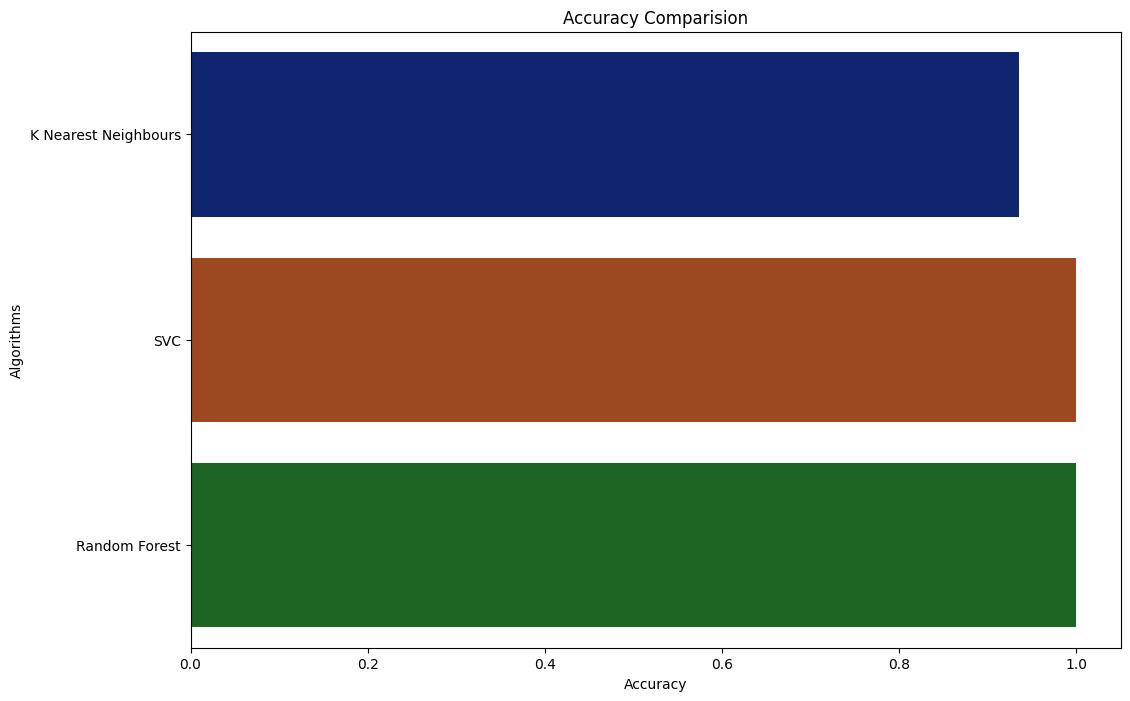

In [129]:
#ACCURACY COMPARISION

plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark')

In [130]:
accuracy_models = dict(zip(model,acc))
for k,v in accuracy_models.items():
  print(k,'-->',v* 100,'%')

K Nearest Neighbours --> 93.54838709677419 %
SVC --> 100.0 %
Random Forest --> 100.0 %


In [131]:
accuracy_score(y_test,predicted)

1.0

In [132]:
def recommendation(temparature,	humidity,	moisture,	soil,	crop,	N,	K,	P):
    features = np.array([[temparature,	humidity,	moisture,	soil,	crop,	N,	K,	P]])
    prediction = rfc.predict(features).reshape(1,-1)
    
    return prediction[0]

In [133]:
N = 37
K = 0
P = 0

temparature = 26
humidity = 52
moisture = 38
soil = 4
crop = 3

predict = recommendation(temparature,	humidity,	moisture,	soil,	crop,	N,	K,	P)
fertilizer_dict = {0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}

if predict[0] in fertilizer_dict:
    fertilizer = fertilizer_dict[predict[0]]
    print("{} is a best fertilizer for cultivation of {} ".format(fertilizer,croptype_dict[crop]))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Urea is a best fertilizer for cultivation of Maize 


In [134]:
import pickle
pickle.dump(rfc,open('models/fertilizer.pkl','wb'))